In [1]:
#!pip install streamlit
#!pip install plotly
#!pip install seaborn

In [1]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import iplot

# Bibliotecas

# Carregar o Dataframe

In [2]:
# Carregar o arquivo CSV
df_ifes = pd.read_csv('data_ifes.csv')
df_ifes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3791 non-null   object 
 1   data_publicacao      3791 non-null   object 
 2   diretoria            3791 non-null   object 
 3   numero_revista       3791 non-null   int64  
 4   codigo               3791 non-null   float64
 5   titulo               3791 non-null   object 
 6   numero               3791 non-null   object 
 7   data_deposito        3791 non-null   object 
 8   data_prioridade      4 non-null      object 
 9   cod_prioridade       4 non-null      object 
 10  classif_internacion  3728 non-null   object 
 11  classif_nacion       2516 non-null   object 
 12  titulo_inid          3791 non-null   object 
 13  titular_nome         3791 non-null   object 
 14  titular_uf           3782 non-null   object 
 15  titular_pais         3791 non-null   o

In [3]:
df_ifes.head(10)

,ID,data_publicacao,diretoria,numero_revista,codigo,titulo,numero,data_deposito,data_prioridade,cod_prioridade,...,titular_uf1,titular_uf2,classif_nac1,classif_nac2,classif_nac3,classif_internac1,classif_internac2,classif_internac3,inventor_1,inventor_outros
0,ID00003,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2017 004929-9,13/03/2017,NaN,NaN,...,CE,NaN,H01Q 13/106,H01Q 1/241,NaN,H01Q 13/10,H01Q 1/24,NaN,ANTONIO SERGIO BEZERRA SOMBRA,RONALDO GLAUBER MAIA DE OLIVEIRA; ANTÔNIO JEFF...
1,ID00005,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2017 026178-6,05/12/2017,NaN,NaN,...,AM,NaN,H04L 67/42,H04L 61/1558,H04L 29/12141,H04L 29/06,H04L 29/12,NaN,EDUARDO JAMES PEREIRA SOUTO,NAMEDIN PEREIRA TELES JÚNIOR
2,ID00011,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2018 012005-0,13/06/2018,NaN,NaN,...,PE,PE; PE,G01D 3/08,NaN,NaN,G01D 3/08,NaN,NaN,JOSÉ EDUARDO FERREIRA DE OLIVEIRA,NELSON GONÇALVES DA SILVA; EDUARDO JOSÉ ALÉCIO...
3,ID00015,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2018 012049-2,14/06/2018,NaN,NaN,...,GO,NaN,A21D 13/045,A21D 13/047,A21D 13/066,A21D 13/045,A21D 13/047,A21D 13/066,RAFAIANE MACEDO GUIMARÃES,MARIANA BURANELO EGEA
4,ID00024,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2018 012161-8,14/06/2018,NaN,NaN,...,MG,NaN,NaN,NaN,NaN,C12Q 1/68,C12R 1/01,NaN,ANA GRACI BRITO MADURRO,JOÃO MARCOS MADURRO; PEDRO HENRIQUE GONÇALVES ...
5,ID00026,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2018 012376-9,18/06/2018,NaN,NaN,...,MA,NaN,NaN,NaN,NaN,C12Q 1/00,NaN,NaN,ALLYSSON KAYRON DE CARVALHO SILVA,LAIANE ARAÚJO DA SILVA SOUTO; TALITA DA SILVA ...
6,ID00030,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2018 012385-8,18/06/2018,NaN,NaN,...,PR,NaN,C01B 39/04,NaN,NaN,C01B 39/04,NaN,NaN,PEDRO AUGUSTO ARROYO,MURILO PEREIRA MOISÉS; ELCIANE REGINA ZANATTA
7,ID00031,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2018 012394-7,18/06/2018,NaN,NaN,...,RJ,RS,G01N 29/0645,NaN,NaN,G01N 29/06,NaN,NaN,THOMAS GABRIEL ROSAURO CLARKE,SERGIO DAMASCENO SOARES; RICARDO CALLEGARI JAC...
8,ID00035,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2018 012412-9,18/06/2018,NaN,NaN,...,PB,NaN,A23C 19/0765,A23L 33/135,A23L 33/21,A23C 19/076,A23L 33/135,A23L 33/21,JANAINA SEVERO DE LIMA GAMA,MARIA ELIEIDY GOMES DE OLIVEIRA; ANA CRISTINA ...
9,ID00036,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2018 012435-8,18/06/2018,NaN,NaN,...,MG,NaN,NaN,NaN,NaN,H02S 40/32,G05F 1/67,NaN,LUIZ CARLOS GOMES DE FREITAS,LUCAS PEREIRA PIRES; LUIZ CARLOS DE FREITAS


In [4]:
#Transformar colunas data_publicacao, data_deposito e data_prioridade em datas
df_ifes['data_publicacao'] = pd.to_datetime(df_ifes['data_publicacao'], format='%d/%m/%Y')
df_ifes['data_deposito'] = pd.to_datetime(df_ifes['data_deposito'], format='%d/%m/%Y')
df_ifes['data_prioridade'] = pd.to_datetime(df_ifes['data_prioridade'], format='%d/%m/%Y')

In [16]:
# Extrair o ano e o mês
df_ifes['ano_dep'] = df_ifes['data_deposito'].dt.year
df_ifes['mes_dep'] = df_ifes['data_deposito'].dt.month

# Agrupar os dados por ano e mês para contar o número de patentes depositadas
df_mes = df_ifes.groupby(['ano_dep', 'mes_dep'])['titular_nome'].count().reset_index()
df_mes['ano_mes_dep'] = df_mes.apply(lambda x: f"{x['ano_dep']}-{x['mes_dep']:02d}", axis=1)
df_mes = df_mes.rename(columns={'titular_nome': 'Patentes', 'ano_dep': 'Ano', 'mes_dep': 'Mês', 'ano_mes_dep':'Ano_Mês'})


print(df_mes)


     Ano  Mês  Patentes  Ano_Mês
0   2003    5         1  2003-05
1   2003   11         1  2003-11
2   2007    3         1  2007-03
3   2011    4         1  2011-04
4   2011    5         1  2011-05
..   ...  ...       ...      ...
91  2022    2         1  2022-02
92  2022    5         1  2022-05
93  2022    6         1  2022-06
94  2022    7         2  2022-07
95  2022   11         1  2022-11

[96 rows x 4 columns]


In [7]:
# Agrupar os dados por ano para contar o número de patentes depositadas
df_ano = df_ifes.groupby(['ano_dep'])['titular_nome'].count().reset_index()
df_ano = df_ano.rename(columns={'titular_nome': 'Patentes', 'ano_dep': 'Ano'})
print(df_ano)

     Ano  Patentes
0   2003         2
1   2007         1
2   2011         2
3   2012         3
4   2013         3
5   2014        12
6   2015        12
7   2016        17
8   2017        37
9   2018       611
10  2019      1132
11  2020      1116
12  2021       825
13  2022        18


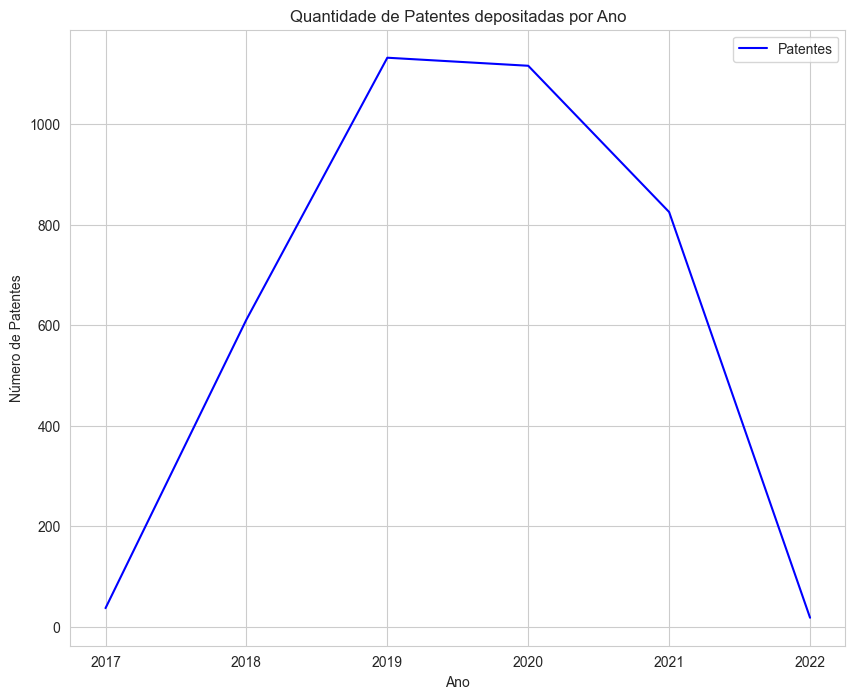

In [28]:

# Configure o estilo do Seaborn (opcional)
sns.set_style("whitegrid")

# Selecione os dados apos 2016
df_ano_corte = df_ano[df_ano['Ano'] >= 2016]

# Crie o gráfico de linhas
plt.figure(figsize=(10, 8))  # Defina o tamanho da figura (opcional)
sns.lineplot(data=df_ano_corte, x='Ano', y='Patentes', linestyle='-', color='b', label='Patentes')

# Configure os rótulos e o título
plt.xlabel('Ano')
plt.ylabel('Número de Patentes')
plt.title('Quantidade de Patentes depositadas por Ano')

# Configure o intervalo do eixo x para exibir apenas anos inteiros
plt.xticks(range(df_ano['Ano'].min(), df_ano['Ano'].max() + 1))

# Exiba o gráfico
plt.show()



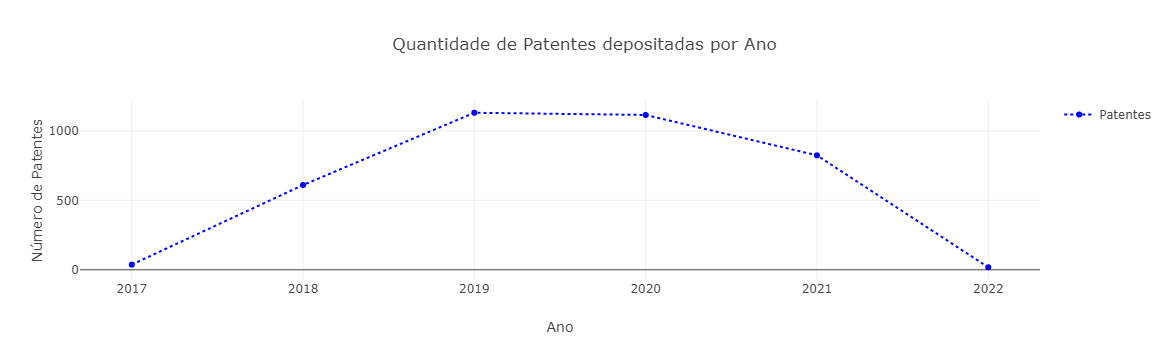

In [29]:
# Crie o gráfico de dispersão
trace = go.Scatter(x=df_ano_corte['Ano'], y=df_ano['Patentes'], mode='lines+markers', line=dict(color='blue', dash='dot'), name='Patentes')
layout = go.Layout(title='Quantidade de Patentes depositadas por Ano',
                   xaxis=dict(title='Ano'),
                   yaxis=dict(title='Número de Patentes'),
                   showlegend=True,
                   xaxis_showgrid=True,
                   yaxis_showgrid=True)
fig = go.Figure(data=[trace], layout=layout)

pyo.iplot(fig)

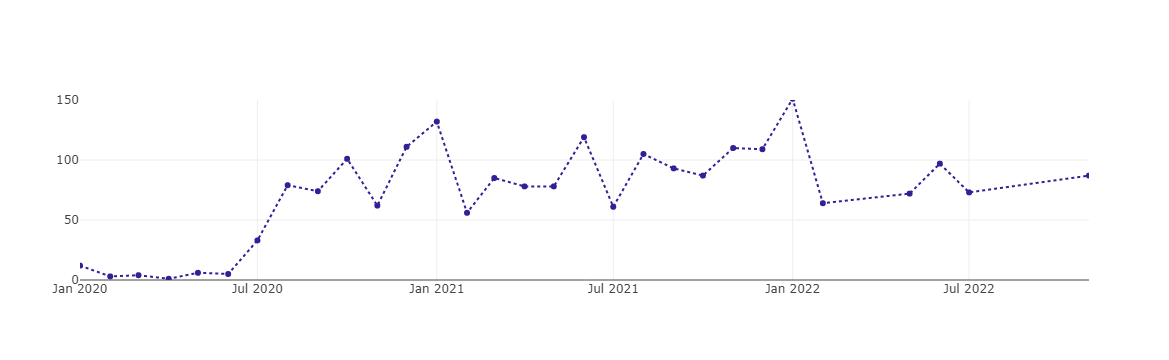

In [30]:
# Gráfico 2: Numero de patentes depositadas por mês
# Filtre os dados para incluir apenas meses a partir de janeiro de 2016
df_mes_corte = df_mes[df_mes['Ano_Mês'] >= '2016-01']

trace = go.Scatter(x=df_mes_corte['Ano_Mês'], y=df_mes['Patentes'],
                    mode='lines+markers', 
                    name='Patentes depositadas pelas IFES de 2020 a 2023',
                    line={'color': '#341f97', 'dash': 'dot'})

layout = go.Layout(yaxis={'range': [0, 150],  'showgrid': True},
                   xaxis={'range': ['2020-01', df_mes['Ano_Mês'].max()]})

fig = go.Figure(data=[trace], layout=layout)

iplot(fig)


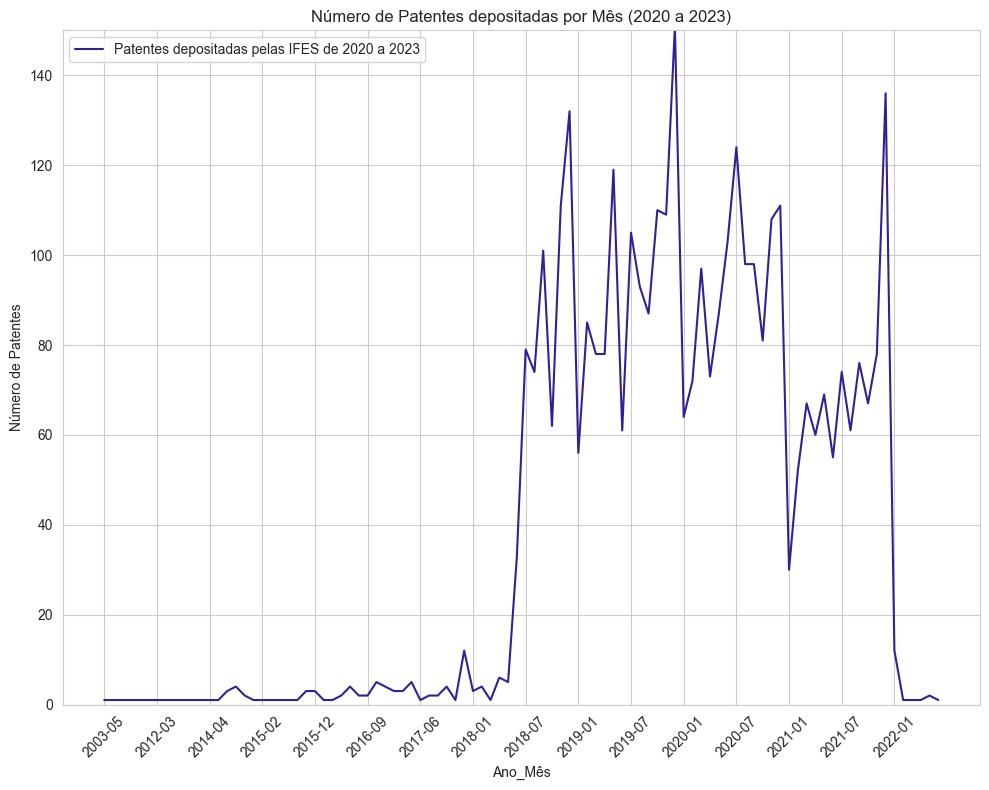

In [31]:
plt.figure(figsize=(10, 8))  # Ajuste o tamanho da figura para melhor acomodar os rótulos do eixo x

plt.plot(df_mes['Ano_Mês'], df_mes['Patentes'], linestyle='-', color='#341f97', label='Patentes depositadas pelas IFES de 2020 a 2023')
plt.ylim(0, 150)
plt.xlabel('Ano_Mês')
plt.ylabel('Número de Patentes')
plt.title('Número de Patentes depositadas por Mês (2020 a 2023)')

# Configure o intervalo para exibir rótulos do eixo x a cada 3 meses
step = 6
plt.xticks(df_mes['Ano_Mês'][::step], rotation=45)

plt.grid(True)
plt.legend()

plt.tight_layout()  # Ajusta o layout para evitar cortes

plt.show()



In [32]:
df_ifes_rank = df_ifes.groupby('titular_abv').agg(contagem=('titular_abv', 'size')).reset_index()
df_ifes_rank = df_ifes_rank.sort_values(by='contagem', ascending=False)
df_ifes_rank

,titular_abv,contagem
43,UFCG,268
54,UFMG,264
60,UFPB,255
61,UFPE,148
81,UFU,114
...,...,...
91,UNILAB,1
30,IFSERTAOPE,1
74,UFSB,1
39,UFAPE,1


C:\Users\RaniRob\AppData\Local\Temp\ipykernel_972\2443009725.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




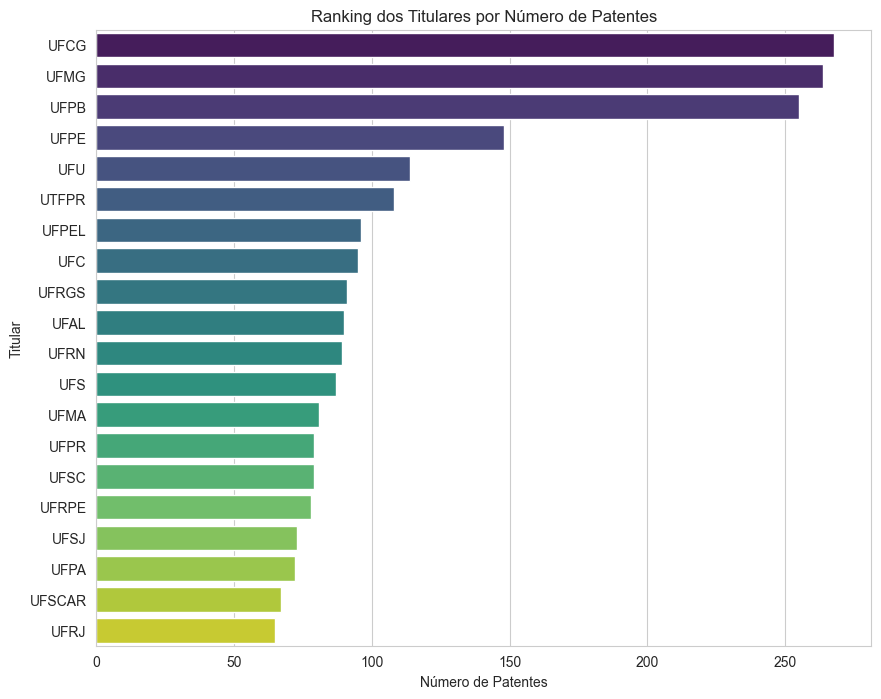

In [33]:
plt.figure(figsize=(10, 8))
sb.barplot(x='contagem', y='titular_abv', data=df_ifes_rank.head(20), palette='viridis')

plt.xlabel('Número de Patentes')
plt.ylabel('Titular')
plt.title('Ranking dos Titulares por Número de Patentes')

# Exiba o gráfico
plt.show()


In [36]:
df_ifes.columns

Index(['ID', 'data_publicacao', 'diretoria', 'numero_revista', 'codigo',
       'titulo', 'numero', 'data_deposito', 'data_prioridade',
       'cod_prioridade', 'classif_internacion', 'classif_nacion',
       'titulo_inid', 'titular_nome', 'titular_uf', 'titular_pais',
       'inventor_nome', 'titular_1', 'titular_parceiros1',
       'titular_parceiros2', 'titular_abv', 'titular_uf1', 'titular_uf2',
       'classif_nac1', 'classif_nac2', 'classif_nac3', 'classif_internac1',
       'classif_internac2', 'classif_internac3', 'inventor_1',
       'inventor_outros', 'ano_dep', 'mes_dep', 'natureza'],
      dtype='object')

In [37]:
# Criar a coluna 'natureza' com os 5 primeiros dígitos da coluna 'numero'
df_ifes['natureza'] = df_ifes['numero'].str[3:5]

# Dicionário de mapeamento de intervalos de códigos de natureza para descrições
mapeamento_natureza = {
    '01-09': 'Não Identificado',
    '10-19': 'Patente de Invenção e Certificado de Adição',
    '20-29': 'Patente Modelo de Utilidade',
    '30-39': 'Processos de Registro de Desenhos Industriais',
    '40-49': 'Processos de Proteção da Indicação Geográfica',
    '50-59': 'Processos de Registro de Programas de Computador',
    '60-69': 'Processos de Registro de Topografias de Circuitos Integrados',
    '70-79': 'Processos de Contratos de Transferência de Tecnologia',
}

# Mapeie os códigos de natureza para as descrições usando os intervalos
df_ifes['natureza'] = df_ifes['natureza'].map(lambda x: next((v for k, v in mapeamento_natureza.items() if k[0] <= x <= k[3:]), x))


# Agrupe os dados por 'Ano' e 'natureza' e conte o número de patentes
df_ifes_natureza = df_ifes.groupby(['ano_dep', 'natureza'])['titular_nome'].count().reset_index()
df_ifes_natureza = df_ifes_natureza.rename(columns={'titular_nome': 'Patentes'})

# Certifique-se de que a tabela 'data_tit_natureza' contenha as colunas 'Ano', 'natureza' e 'Patentes'
print(df_ifes_natureza)

    ano_dep                                     natureza  Patentes
0      2003                             Não Identificado         2
1      2007                             Não Identificado         1
2      2011  Patente de Invenção e Certificado de Adição         2
3      2012                  Patente Modelo de Utilidade         1
4      2012  Patente de Invenção e Certificado de Adição         2
5      2013  Patente de Invenção e Certificado de Adição         3
6      2014                  Patente Modelo de Utilidade         1
7      2014  Patente de Invenção e Certificado de Adição        11
8      2015  Patente de Invenção e Certificado de Adição        12
9      2016  Patente de Invenção e Certificado de Adição        17
10     2017                  Patente Modelo de Utilidade         1
11     2017  Patente de Invenção e Certificado de Adição        36
12     2018                  Patente Modelo de Utilidade        25
13     2018  Patente de Invenção e Certificado de Adição      

In [38]:
df_ifes_natureza2 = df_ifes.groupby(['natureza'])['titular_nome'].count().reset_index()
df_ifes_natureza2


,natureza,titular_nome
0,Não Identificado,3
1,Patente Modelo de Utilidade,222
2,Patente de Invenção e Certificado de Adição,3566


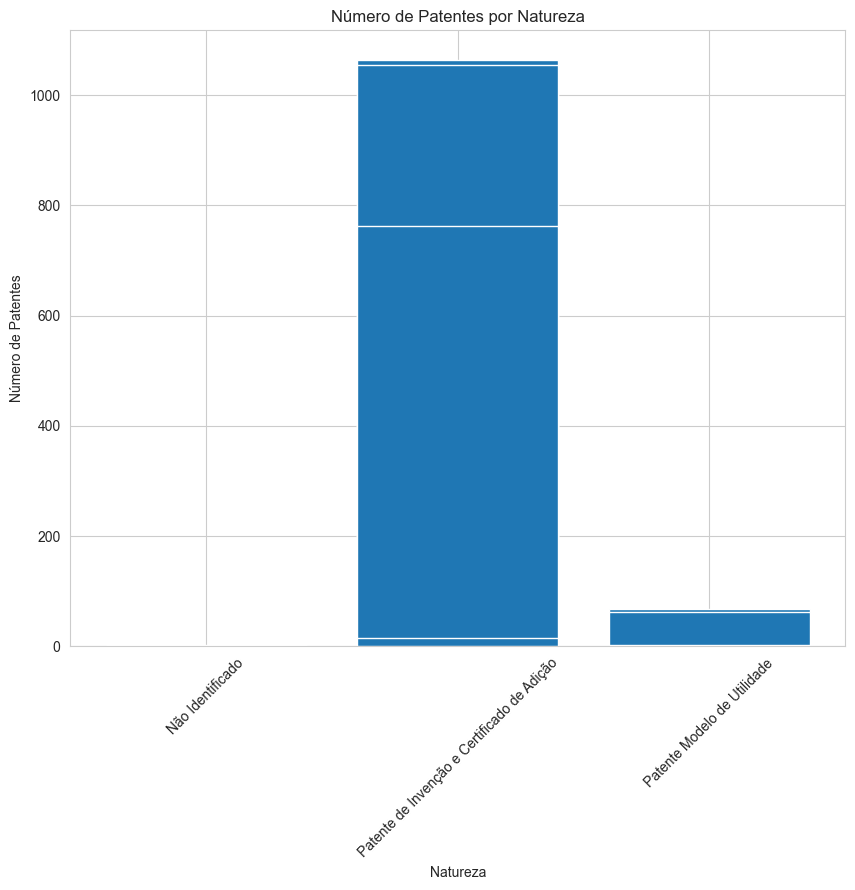

In [39]:
# Crie um gráfico de barras
plt.figure(figsize=(10, 8))
plt.bar(df_ifes_natureza['natureza'], df_ifes_natureza['Patentes'])
plt.xlabel('Natureza')
plt.ylabel('Número de Patentes')
plt.title('Número de Patentes por Natureza')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade

# Exiba o gráfico
plt.show()

In [42]:
df_ifes_natureza.columns

Index(['ano_dep', 'natureza', 'Patentes'], dtype='object')

C:\Users\RaniRob\AppData\Local\Temp\ipykernel_972\1621735632.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



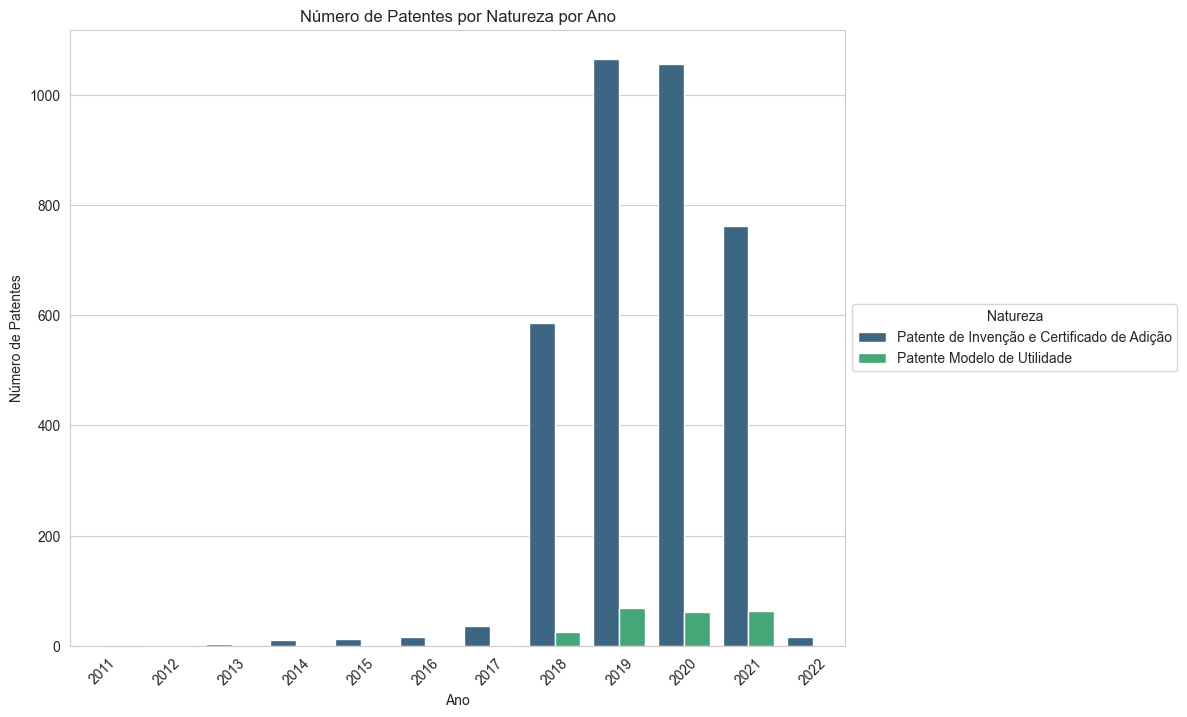

In [44]:
# Filtrar os dados para remover aqueles com 'natureza' igual a 'NI'
df_ifes_natureza_filtrado = df_ifes_natureza[df_ifes_natureza['natureza'] != 'Não Identificado']

# Converter a coluna 'Ano' para números inteiros
df_ifes_natureza_filtrado['dep_ano'] = df_ifes_natureza_filtrado['ano_dep'].astype(int)

# Criar um gráfico de barras empilhadas com o Seaborn
plt.figure(figsize=(10, 8))
sb.barplot(x='dep_ano', y='Patentes', hue='natureza', data=df_ifes_natureza_filtrado, palette='viridis')
plt.xlabel('Ano')
plt.ylabel('Número de Patentes')
plt.title('Número de Patentes por Natureza por Ano')

# Exiba o gráfico
plt.xticks(rotation=45)
plt.legend(title='Natureza', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

